### TODO
- LOWESS : find a way to have a (M,1) shaped proximity weights as a class parameter
- ALL :   <s>reshape Entry Data</s>(reshaped) ,or make sure its the same shape
- ALL : make sure that also X is the right shape 

## ERRORS
<details>
<summary>non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,32)
-> y.reshape</summary>
1
</details>
<details>
<summary>error 2</summary>
2
</details>


## Notes
- when using the Stochastic gradient descent or the Mini-Batch, we can notice that the cost function oscillate alot when there is noise in the data. the less noise there is the smother the cost function curve is.


In [2]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as llr
from sklearn.metrics import r2_score

# Custom imports
from LinearRegression import LinearRegression
from LocallyWeightedRegression import LocallyWeightedRegression
import utils


In [3]:
# HELPER FUNCTIONS


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2,dtype=np.float64)

def r2_score_custom(y_pred, y_true):

    y_avg = np.mean(y) 

    return (1-(np.sum(np.square(y_pred- y_true))/np.sum(np.square(y_pred- y_avg))))

In [4]:
# DATASET CREATION, DATASET SPLIT


# Data -- 1
# X, y = datasets.make_regression(n_samples=400, n_features=1, noise=10, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Data -- 2
np.random.seed(8)
X_train = np.random.randn(500,1)
y_train = 2*(X_train**2) + 10 + 4.6*np.random.randn(500,1)
print(y_train.shape)
# y_train = y_train.reshape(y_train.shape[0])
print(y_train.shape)
X = X_train
y= y_train

# Data -- 3
# np.random.seed(8)
# X = np.random.randn(1000,1)
# y = 3*(X**3) + 2*(X**2) + 10 + 4.6*np.random.randn(1000,1)
# y = y.reshape(y.shape[0])
# X_train = X
# y_train = y


# Data -- 4
# np.random.seed(0) # permet de reproduire l'aléatoire
# X, y = datasets.make_regression(n_samples=1000, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
# y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire
# y = y.reshape(y.shape[0])
# X_train = X
# y_train = y


(500, 1)
(500, 1)


### Linear Regression

In [12]:
# Model Creation, Fitting parameters, Model predictions


# MLFromscratch Linear Reg
LinReg = LinearRegression(n_iters=1000, optm_algo="SGD")
LinReg.fit(X_train,y_train)
fit_line_1 = LinReg.predict(X_train)
# preds_1 = LinReg.predict(X_test)

# SKlearn Linear Reg
reg = llr().fit(X_train,y_train)
fit_line_2 = reg.predict(X_train)
# preds_2 = reg.predict(X_test)

print(f" r2_score  : {r2_score(fit_line_1,y_train)}")
print(f" r2_score  : {r2_score(fit_line_2,y_train)}")

print(f" r2_score_custom  : {r2_score_custom(fit_line_1,y_train)}")
print(f" r2_score_custom  : {r2_score_custom(fit_line_2,y_train)}")

X --> shape: (500, 1)
y--> shape: (500,)
THETA --> shape: (1,)
Running stochastic G.D...
 r2_score  : -2101697801.9997003
 r2_score  : -33270.99541719591
 r2_score_custom  : -594.1041525237166
 r2_score_custom  : -33270.99541719591


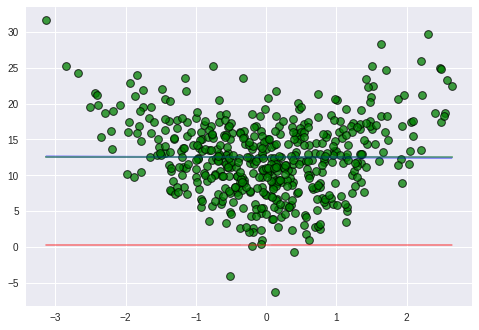

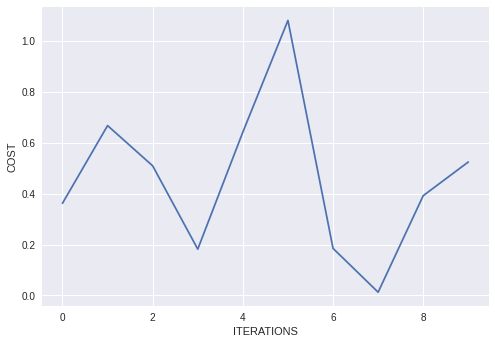

In [13]:
# VISUALIZATION

plt.style.use("seaborn")

# Plot all data point of the first Feature (1D data) & the fitline (regression line)
plt.scatter(X[:,0], y, s=60, color="green", edgecolor="black", linewidth=1, alpha=0.75)
plt.plot(X_train, fit_line_1, color="red", alpha=0.4)
plt.plot(X_train, fit_line_2, color="blue", alpha=0.4)
# mean base model that R2 score is comparing to
plt.plot(X_train, np.repeat(np.mean(y_train),y_train.shape[0]), color="green", alpha=0.4)


plt.show()

# Plot the Cost function variation for each iteration
plt.xlabel("ITERATIONS")
plt.ylabel("COST")
plt.plot(LinReg.costs)



### Locally Weighted Regression (LOWESS)

In [5]:


# MLFromscratch LOWESS
lwr = LocallyWeightedRegression(tau = 0.7)
lwr.predict(X,y, x_new = -2)
weights_gauss =lwr.kernel_gaussian(X, x_new = -2)
print(weights_gauss.shape)
xplot ,yplot = utils.argsort(X[:,0],weights_gauss)


# plt.style.use("seaborn")
# plt.scatter(X[:,0], y, s=60, color="green", edgecolor="black", linewidth=1, alpha=0.75)
# plt.plot(X[:,0],lwr.fitline, color="red", alpha=0.4)
# plt.plot(xplot,yplot, color="blue", alpha=0.4)
# # plt.plot(X_train, fit_line_2, color="blue", alpha=0.4)

# plt.show()


(500,)


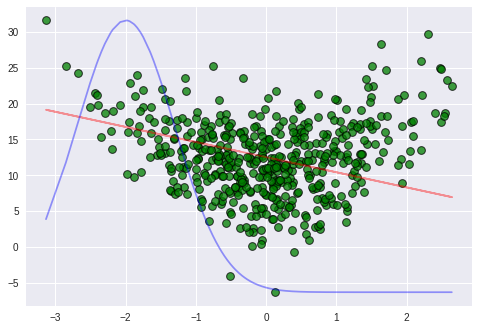

In [6]:
# VISUALIZATION

plt.style.use("seaborn")
fig, ax = plt.subplots()

# Plot all data point of the first Feature (1D data) & the Local fitline (regression line)
ax.scatter(X[:,0], y, s=60, color="green", edgecolor="black", linewidth=1, alpha=0.75)
plt.plot(X[:,0],lwr.fitline, color="red", alpha=0.4)

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()
# Plot the weight distribution around the point to predict
ax2.plot(xplot,yplot, color="blue", alpha=0.4)
ax2.grid(False)
ax2.axes.get_yaxis().set_visible(False)

plt.show()
